In [ ]:
!pip install datasets transformers

# Mini-project 1

Apply Transformers & its variants for a text classification problem.

## Dataset demonstration
In this project, we would conduct classification on [IMDb dataset](https://ai.stanford.edu/~amaas/data/sentiment/), which is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. This dataset provides a set of 25 000 highly polar movie reviews for training, and 25 000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

In [ ]:
!pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pla

In [ ]:
!rm -rf ~/.cache/huggingface/datasets/*

In [ ]:
from datasets import load_dataset

imdb_dataset = load_dataset("imdb")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

### Train set

In [ ]:
imdb_train_set = imdb_dataset["train"]
imdb_train_set

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
imdb_train_set[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

### Test set

In [ ]:
imdb_test_set = imdb_dataset["test"]
imdb_test_set

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
imdb_test_set[0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

## List of models for this project

In [ ]:
import torch
from torch import nn

### BERT
- BERT is a deep learning language model designed to improve the efficiency of natural language processing (NLP) tasks. It is famous for its ability to consider context by analyzing the relationships between words in a sentence bidirectionally. It was introduced by Google researchers in a 2018 paper titled “BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.” Since then, the BERT model has been fine-tuned for use in a variety of fields, including biology, data science, and medicine.

- You could discover [BERT documentation](https://huggingface.co/docs/transformers/en/model_doc/bert) from transformers library @ Huggingface for more details.

- Examples of training use case for Huggingface model: [Huggingface training](https://huggingface.co/docs/transformers/en/training)

In [ ]:
from transformers import (
    BertForSequenceClassification,
    BertTokenizer
)

In [ ]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
example = imdb_train_set[0]['text']
print(' Original: ', example)

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(example))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(example)))

 Original:  I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far 

In [ ]:
# Load model
bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 1
)

bert_model

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# QC
example_tensor = torch.ones(1, 512).type(torch.long)
example_bert_output = bert_model(example_tensor)
example_bert_output

SequenceClassifierOutput(loss=None, logits=tensor([[-0.2537]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Dataset loaded: DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})
Sample data: {'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In b

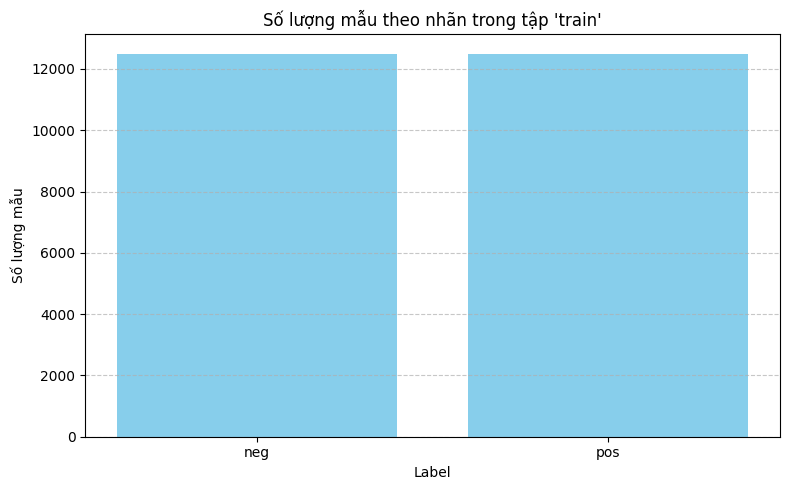

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from datasets import load_dataset
from sklearn.metrics import accuracy_score
import numpy as np
from torch.optim import AdamW
from collections import Counter
import matplotlib.pyplot as plt
import re

# 1. Load & discover dataset
class DatasetLoader:
    def __init__(self, dataset_name):
        self.dataset_name = dataset_name

    def load(self):
        dataset = load_dataset(self.dataset_name)
        print(f"Dataset loaded: {dataset}")
        print(f"Sample data: {dataset['train'][0]}")
        print("\nThông tin chi tiết về các cột:")
        print(dataset['train'].features)
        return dataset

    def count_labels(self, dataset, split='train', label_column='label'):
        if dataset is None:
            print("Dataset is None.")
            return

        # Đếm số lượng theo nhãn
        labels = [example[label_column] for example in dataset[split]]
        label_counts = Counter(labels)

        # Lấy tên nhãn nếu có
        label_names = dataset[split].features[label_column].names if hasattr(dataset[split].features[label_column], "names") else None

        # Chuẩn bị dữ liệu vẽ
        x = [label_names[label] if label_names else str(label) for label in label_counts.keys()]
        y = [label_counts[label] for label in label_counts.keys()]

        # Vẽ biểu đồ
        plt.figure(figsize=(8, 5))
        plt.bar(x, y, color='skyblue')
        plt.xlabel('Label')
        plt.ylabel('Số lượng mẫu')
        plt.title(f"Số lượng mẫu theo nhãn trong tập '{split}'")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        return label_counts

# # 2. Preprocess data
class DataPreprocessor:
    def __init__(self):
        pass

    def clean_text(self, text):
        text = re.sub(r"<.*?>", "", text)                 # Bỏ HTML tags
        text = re.sub(r"[^a-zA-Z\s]", "", text)           # Giữ lại chữ cái và khoảng trắng
        text = text.lower()                               # Chuyển thành chữ thường
        text = re.sub(r"\s+", " ", text).strip()          # Loại bỏ khoảng trắng thừa
        return text

    def preprocess(self, dataset):
        def process(example):
            example['text'] = self.clean_text(example['text'])
            return example

        return dataset.map(process)


if __name__ == "__main__":
    dataset_loader = DatasetLoader("imdb")
    raw_dataset = dataset_loader.load()
    dataset_loader.count_labels(raw_dataset, split='train', label_column='label')


    preprocessor = DataPreprocessor()
    processed_dataset = preprocessor.preprocess(raw_dataset)



In [ ]:
#7 Set up hyperparameters for training procedure
epochs = 3                # số vòng lặp training
batch_size = 16             # kích thước batch
lr = 2e-5        # learning rate (thường từ 1e-5 đến 5e-5 cho BERT)
max_length = 256        # độ dài tối đa mỗi câu khi tokenize
model_name="bert-base-uncased"
num_workers=2
pin_memory=True
num_labels=2

In [ ]:
# # 3. Tokenize data
from transformers import BertTokenizer

class Tokenizer:
    def __init__(self, model_name='bert-base-uncased',max_length=256):
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.max_length = max_length

    def tokenize(self, dataset):
        def tokenize_function(examples):
            return self.tokenizer(
                examples['text'],
                padding='max_length',
                truncation=True,
                max_length=256
            )

        return dataset.map(tokenize_function, batched=True)

In [ ]:
if __name__ == "__main__":
    tokenizer = Tokenizer("bert-base-uncased")
    tokenized_dataset = tokenizer.tokenize(processed_dataset)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
#4 Create a DataLoader
from torch.utils.data import DataLoader

class DataLoaderCreator:
    def __init__(self, batch_size, num_workers=2, pin_memory=True):
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.pin_memory = pin_memory

    def create(self, dataset, shuffle=True):
        dataset.set_format(
            type='torch',
            columns=['input_ids', 'attention_mask', 'label']
        )
        return DataLoader(
            dataset,
            batch_size=self.batch_size,
            shuffle=shuffle,
            num_workers=self.num_workers,
            pin_memory=self.pin_memory
        )

In [ ]:
if __name__ == "__main__":
    loader_creator = DataLoaderCreator(batch_size=16)

    train_dataloader = loader_creator.create(tokenized_dataset['train'])
    test_dataloader = loader_creator.create(tokenized_dataset['test'], shuffle=False)


In [ ]:
#5 Build model
from transformers import BertForSequenceClassification

class ModelBuilder:
    def __init__(self, model_name='bert-base-uncased', num_labels=2):
        self.model_name = model_name
        self.num_labels = num_labels

    def build(self):
        model = BertForSequenceClassification.from_pretrained(
            self.model_name,
            num_labels=self.num_labels
        )
        return model


In [ ]:
if __name__ == "__main__":
    builder = ModelBuilder(model_name='bert-base-uncased', num_labels=2)
    model = builder.build()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import os
import torch
from torch.optim import AdamW
from tqdm import tqdm
from transformers import get_scheduler
from torch.cuda.amp import autocast, GradScaler
#6 Create a training workflow
import torch
from torch.optim import AdamW
from tqdm import tqdm
from transformers import get_scheduler

class Trainer:
    def __init__(self, model, train_dataloader, eval_dataloader, device=None,
                 lr=2e-5, epochs=3, gradient_accumulation_steps=1):

        self.model = model
        self.train_dataloader = train_dataloader
        self.eval_dataloader = eval_dataloader
        self.device = torch.device(device if device else ('cuda' if torch.cuda.is_available() else 'cpu'))
        self.model.to(self.device)
        self.optimizer = AdamW(self.model.parameters(), lr=lr)
        self.epochs = epochs
        self.gradient_accumulation_steps = gradient_accumulation_steps

        total_steps = len(self.train_dataloader) * self.epochs // self.gradient_accumulation_steps
        self.scheduler = get_scheduler(
            "linear",
            optimizer=self.optimizer,
            num_warmup_steps=int(0.1 * total_steps),
            num_training_steps=total_steps
        )

    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0.0

        for step, batch in enumerate(tqdm(self.train_dataloader, desc=f"Training Epoch {epoch}")):
            inputs = {k: v.to(self.device, non_blocking=True) for k, v in batch.items() if k != 'label'}
            labels = batch['label'].to(self.device, non_blocking=True)

            outputs = self.model(**inputs, labels=labels)
            loss = outputs.loss / self.gradient_accumulation_steps
            loss.backward()

            if (step + 1) % self.gradient_accumulation_steps == 0:
                self.optimizer.step()
                self.optimizer.zero_grad()
                self.scheduler.step()

            total_loss += loss.item() * self.gradient_accumulation_steps

        avg_loss = total_loss / len(self.train_dataloader)
        print(f" Train loss: {avg_loss:.4f}")

    def evaluate(self):
        self.model.eval()
        total_correct = 0
        total_samples = 0
        with torch.no_grad():
            for batch in tqdm(self.eval_dataloader, desc="Evaluating"):
                inputs = {k: v.to(self.device, non_blocking=True) for k, v in batch.items() if k != 'label'}
                labels = batch['label'].to(self.device, non_blocking=True)

                outputs = self.model(**inputs)
                preds = torch.argmax(outputs.logits, dim=-1)

                total_correct += (preds == labels).sum().item()
                total_samples += labels.size(0)

        acc = total_correct / total_samples
        print(f" Accuracy: {acc:.4f}")
        return acc

    def train(self):
        for epoch in range(1, self.epochs + 1):
            print(f"\n Epoch {epoch}/{self.epochs}")
            self.train_epoch(epoch)
            self.evaluate()



In [ ]:
from google.colab import drive

if __name__ == "__main__":
    trainer = Trainer(model, train_dataloader, test_dataloader, lr=2e-5, epochs=3, gradient_accumulation_steps=2)
    trainer.train()


Mounted at /content/drive


<ipython-input-23-29e9b92bf997>:21: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler()



 Epoch 1/3


Training Epoch 1:   0%|          | 0/1563 [00:00<?, ?it/s]<ipython-input-23-29e9b92bf997>:51: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Training Epoch 1: 100%|██████████| 1563/1563 [04:49<00:00,  5.41it/s]


 Train loss: 0.3077


Evaluating:   0%|          | 0/1563 [00:00<?, ?it/s]<ipython-input-23-29e9b92bf997>:78: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Evaluating: 100%|██████████| 1563/1563 [01:27<00:00, 17.85it/s]


 Accuracy: 0.9183
 Checkpoint saved: /content/drive/MyDrive/checkpoints/bert_model/checkpoint_epoch_1.pth

 Epoch 2/3


Training Epoch 2: 100%|██████████| 1563/1563 [04:53<00:00,  5.33it/s]


 Train loss: 0.1485


Evaluating: 100%|██████████| 1563/1563 [01:29<00:00, 17.48it/s]


 Accuracy: 0.9228
 Checkpoint saved: /content/drive/MyDrive/checkpoints/bert_model/checkpoint_epoch_2.pth

 Epoch 3/3


Training Epoch 3: 100%|██████████| 1563/1563 [04:55<00:00,  5.30it/s]


 Train loss: 0.0715


Evaluating: 100%|██████████| 1563/1563 [01:27<00:00, 17.89it/s]


 Accuracy: 0.9218
 Checkpoint saved: /content/drive/MyDrive/checkpoints/bert_model/checkpoint_epoch_3.pth


In [ ]:
#10 Infer model
class Inference:
    def __init__(self, model, tokenizer, device=None):
        self.model = model
        self.tokenizer = tokenizer
        self.device = torch.device(device if device else ('cuda' if torch.cuda.is_available() else 'cpu'))
        self.model.to(self.device)
        self.model.eval()
        self.label_map = {0: "negative", 1: "positive"}

    def predict(self, text):
        if isinstance(text, str):
            texts = [text]
        else:
            texts = text

        inputs = self.tokenizer(
            texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=256
        )
        inputs = {k: v.to(self.device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = self.model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().tolist()

        # Trả về nhãn dạng text
        labels = [self.label_map[p] for p in preds]

        return labels[0] if isinstance(text, str) else labels
